**Loading The .txt files**

In [2]:
import pandas as pd

# Path to your file
file_path = "C:\\Users\\ASUS\\Downloads\\AI Lab Project\\test.ft.txt\\test.ft.txt"  # Replace with actual path

# Read the file line by line
data = []
with open(file_path, 'r', encoding='utf-8') as f:
    for line in f:
        line = line.strip()
        if line:
            if line.startswith("__label__2"):
                sentiment = "Positive"
                review = line.replace("__label__2", "").strip()
            elif line.startswith("__label__1"):
                sentiment = "Negative"
                review = line.replace("__label__1", "").strip()
            else:
                continue
            data.append((review, sentiment))

# Create DataFrame
df = pd.DataFrame(data, columns=["review", "sentiment"])

# Shuffle and save
df = df.sample(frac=1, random_state=42).reset_index(drop=True)
df.to_csv("product_reviews_test.csv", index=False)

print("✅ CSV file saved! Shape:", df.shape)

✅ CSV file saved! Shape: (400000, 2)


# Preprocessing

In [ ]:
import pandas as pd
import string
import nltk
import re

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


'''# --- NLTK Setup ---
nltk_data_path = './nltk_data'
os.makedirs(nltk_data_path, exist_ok=True)
nltk.download('punkt', download_dir=nltk_data_path)
nltk.download('stopwords', download_dir=nltk_data_path)
nltk.download('wordnet', download_dir=nltk_data_path)
nltk.download('omw-1.4', download_dir=nltk_data_path)
nltk.data.path.append(nltk_data_path)'''

# --- Text Preprocessing ---
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    if pd.isnull(text):
        return ''
    # Lowercase
    text = text.lower()
    # Remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove numbers
    text = re.sub(r'\d+', '', text)

    text = text.strip()
    # Replace word_tokenize with basic split
    tokens = text.split()
    # Remove stopwords & lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

# --- Load Data ---
train_df = pd.read_csv("product_reviews_train.csv")
test_df = pd.read_csv("product_reviews_test.csv")

# --- Apply Preprocessing ---
train_df['clean_review'] = train_df['review'].apply(preprocess_text)
test_df['clean_review'] = test_df['review'].apply(preprocess_text)

# --- Preview ---
print(train_df[['review', 'clean_review']].head())


In [ ]:
train_df.to_csv("cleaned_product_reviews_train.csv", index=False)
test_df.to_csv("cleaned_product_reviews_test.csv", index=False)

In [ ]:
train_df.dropna(subset=['clean_review'], inplace=True)
test_df.dropna(subset=['clean_review'], inplace=True)

In [ ]:
# Check for missing values in 'clean_review' column
missing_train = train_df['clean_review'].isna().sum()
missing_test = test_df['clean_review'].isna().sum()

print(f"Missing values in training data: {missing_train}")
print(f"Missing values in testing data: {missing_test}")

Missing values in training data: 0
Missing values in testing data: 0


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import FeatureUnion
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
# --- Load Data ---
train_df = pd.read_csv("cleaned_product_reviews_train.csv")
test_df = pd.read_csv("cleaned_product_reviews_test.csv")

#  TF-IDF Vectorization + Model Training (SVM)

In [ ]:

import string
import nltk
import re

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Extract features
vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=100000)
X_train = vectorizer.fit_transform(train_df['clean_review'])
X_test = vectorizer.transform(test_df['clean_review'])

# Labels
y_train = train_df['sentiment']
y_test = test_df['sentiment']

# Train the model
model = LinearSVC()
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print("\n💥 Accuracy Score:", accuracy_score(y_test, y_pred))
print("\n📊 Classification Report:\n", classification_report(y_test, y_pred))
print("\n🧱 Confusion Matrix:\n", confusion_matrix(y_test, y_pred))



💥 Accuracy Score: 0.9125897814744537

📊 Classification Report:
               precision    recall  f1-score   support

    Negative       0.91      0.91      0.91    200000
    Positive       0.91      0.91      0.91    199999

    accuracy                           0.91    399999
   macro avg       0.91      0.91      0.91    399999
weighted avg       0.91      0.91      0.91    399999


🧱 Confusion Matrix:
 [[182067  17933]
 [ 17031 182968]]


**Save the Model**

In [ ]:
import joblib

joblib.dump(model, 'svm_sentiment_model.pkl')
joblib.dump(vectorizer, 'tfidf_vectorizer.pkl')

['tfidf_vectorizer.pkl']

**Plot Confusion Matrix**

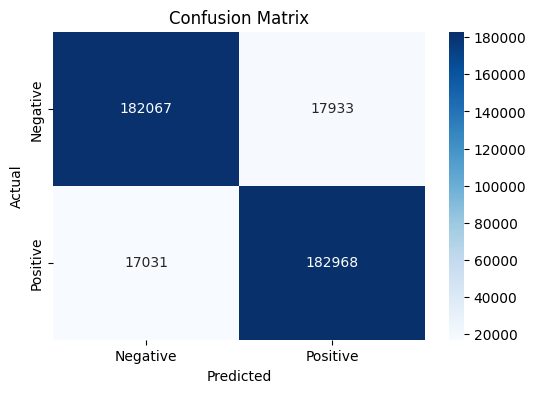

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


**Testing the Model**

In [44]:
import joblib
# Load model and vectorizer
model = joblib.load('svm_sentiment_model.pkl')
vectorizer = joblib.load('tfidf_vectorizer.pkl')

In [ ]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
import spacy
import re
import string
import pandas as pd

# Load spaCy
nlp = spacy.load("en_core_web_sm")
stop_words = set(ENGLISH_STOP_WORDS)

# Clean & Lemmatize
def preprocess_text(text):
    if pd.isnull(text):
        return ""
    
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)
    text = re.sub(r'\d+', '', text)
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.strip()

    doc = nlp(text)
    tokens = [token.lemma_ for token in doc if token.text not in stop_words and not token.is_punct and not token.is_space]
    
    return ' '.join(tokens)


In [ ]:
# Example sample input
sample = ["This product is absolutely amazing!", "Worst purchase I've made, very disappointed."]

# Preprocess
sample_clean = [preprocess_text(s) for s in sample]

# Transform using trained vectorizer
sample_vec = vectorizer.transform(sample_clean)

# Predict sentiment
predicted_sentiment = model.predict(sample_vec)[0]
print("🧠 Predicted Sentiment:", predicted_sentiment)

# Predict probabilities
y_probs = model.decision_function(sample_vec)
# Convert decision function values into sentiment predictions
predictions = ['Positive' if value > 0 else 'Negative' for value in y_probs]

# Print results
for sample, prediction in zip(sample, predictions):
    print(f"Review: {sample}\nPredicted Sentiment: {prediction}\n")

🧠 Predicted Sentiment: Positive
Review: This product is absolutely amazing!
Predicted Sentiment: Positive

Review: Worst purchase I've made, very disappointed.
Predicted Sentiment: Negative



In [ ]:
# Sample reviews for testing
sample_reviews = [
    "This product is exactly what I needed, works perfectly!",
    "Totally disappointed. It didn’t meet any of my expectations.",
    "It’s alright, not too bad but not great either.",
    "One of the best purchases I’ve made in a while. Highly recommend!",
    "The quality is awful, I regret buying it.",
    "Not as good as I thought, but decent for the price.",
    "Fantastic product! Totally worth it!",
    "I’ve had better, but this is not terrible.",
    "I am so happy with this purchase. Exceeded all my expectations!",
    "Terrible experience, don’t waste your money."
]

# Preprocessing and prediction
sample_clean_reviews = [preprocess_text(review) for review in sample_reviews]
sample_vec = vectorizer.transform(sample_clean_reviews)
predictions = model.predict(sample_vec)

# Print results
for sample, prediction in zip(sample_reviews, predictions):
    print(f"Review: {sample}\nPredicted Sentiment: {prediction}\n")


Review: This product is exactly what I needed, works perfectly!
Predicted Sentiment: Positive

Review: Totally disappointed. It didn’t meet any of my expectations.
Predicted Sentiment: Negative

Review: It’s alright, not too bad but not great either.
Predicted Sentiment: Negative

Review: One of the best purchases I’ve made in a while. Highly recommend!
Predicted Sentiment: Positive

Review: The quality is awful, I regret buying it.
Predicted Sentiment: Negative

Review: Not as good as I thought, but decent for the price.
Predicted Sentiment: Positive

Review: Fantastic product! Totally worth it!
Predicted Sentiment: Positive

Review: I’ve had better, but this is not terrible.
Predicted Sentiment: Negative

Review: I am so happy with this purchase. Exceeded all my expectations!
Predicted Sentiment: Positive

Review: Terrible experience, don’t waste your money.
Predicted Sentiment: Negative

